<a href="https://colab.research.google.com/github/fisicadeparticulas/20210915_procesamientodearchivoslhe-YurRo99/blob/main/Copia_de_Sample6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import norm

events=pd.read_csv("https://goo.gl/5kgxKF")
events.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,-1,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1
1,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,-1,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1
2,165617,75167029,G,9.7583,2.3903,-3.7824,8.6715,4.4744,1.4156,-1.0072,-1,G,13.5684,-3.3975,5.1910,12.0665,6.2039,1.4187,2.1503,1
3,165617,75281957,G,9.6365,1.6516,-5.4313,7.7862,5.6769,1.1213,-1.2756,1,G,7.0263,-1.6449,4.4418,5.1887,4.7366,0.9473,1.9255,-1
4,165617,75393376,G,6.0112,3.3614,2.8883,4.0598,4.4318,0.8208,0.7098,-1,G,7.7557,-5.0416,-3.0126,5.0642,5.8731,0.7806,-2.6030,1


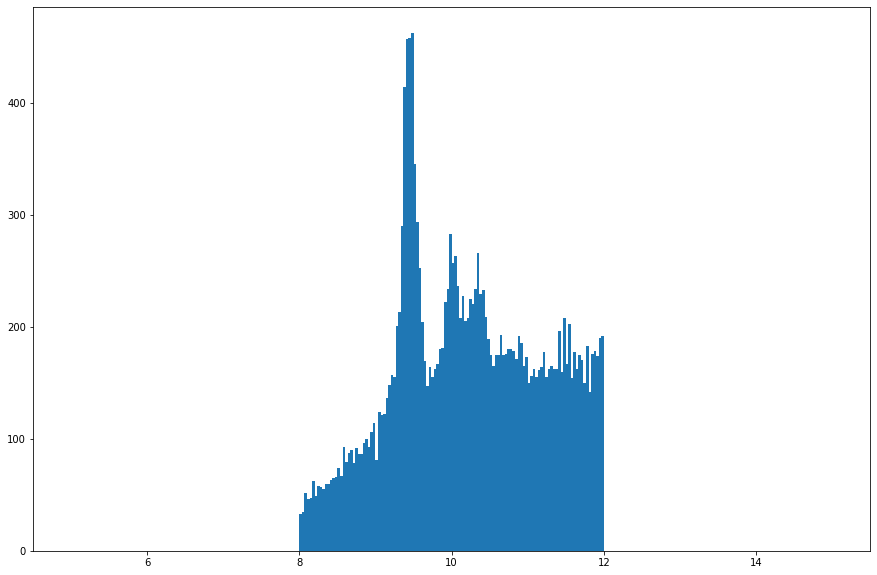

In [3]:
data=np.genfromtxt("https://goo.gl/5kgxKF", delimiter=",", names=["R","ev","ty1","E1","px1","py1","pz1","pt1","eta1","phi1","Q1","ty2","E2","px2","py2","pz2","pt2","eta2","phi2","Q2"])


#Masa invariante

E=(data["E1"]+data["E2"])**2
P=((data["px1"]+data["px2"])**2+(data["py1"]+data["py2"])**2+(data["pz1"]+data["pz2"])**2)
IM=np.sqrt(E-P)

fig=plt.figure(figsize=(15, 10))
plt.hist(IM, 300, range = (5, 15))
plt.show()


La masa esta entorno a 9.5 GeV/c^2 lo cual indica que la particula deberia ser un Upsilon meson, con masa de 9.46 GeV/c^2.

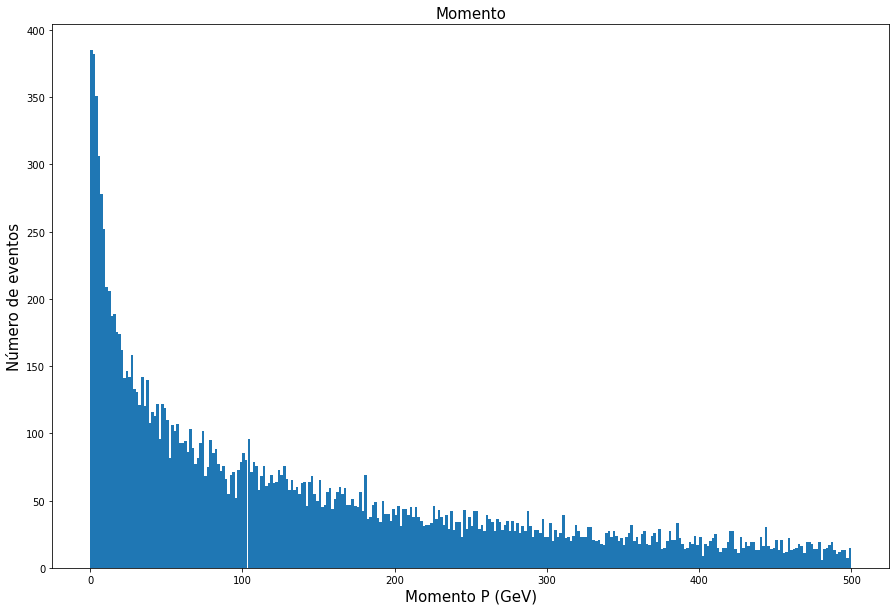

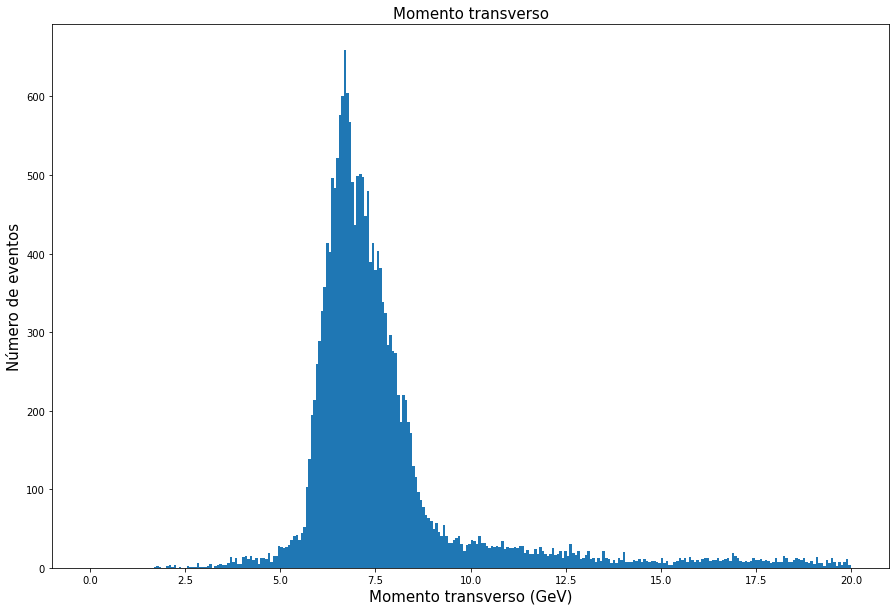

In [4]:
#Momento y momento transverso

fig=plt.figure(figsize=(15, 10))
plt.hist(P, 300, range = (0, 500))
plt.xlabel("Momento P (GeV)", fontsize=15)
plt.ylabel("Número de eventos", fontsize=15)
plt.title("Momento", fontsize=15)
plt.show()

Pt=np.sqrt(data["pt1"]**2+data["pt2"]**2)

fig=plt.figure(figsize=(15, 10))
plt.hist(Pt, 300, range = (0, 20))
plt.xlabel("Momento transverso (GeV)", fontsize=15)
plt.ylabel("Número de eventos", fontsize=15)
plt.title("Momento transverso", fontsize=15)
plt.show()

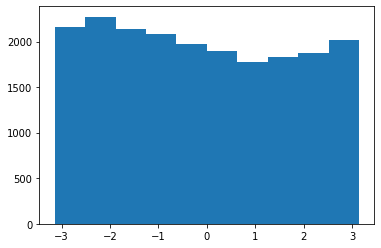

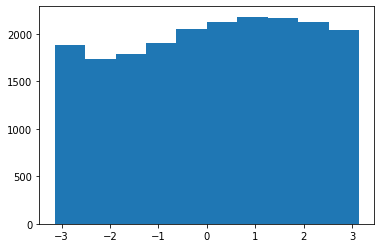

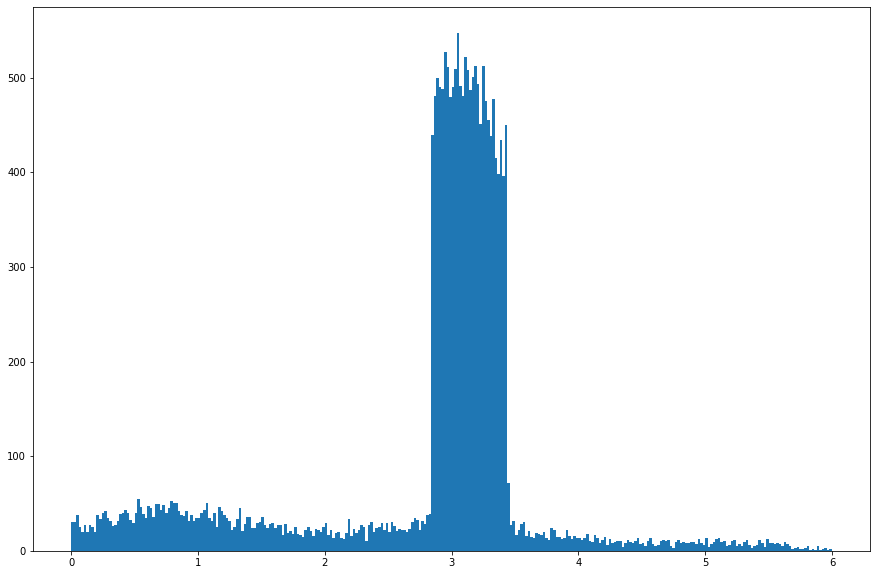

In [5]:
#Ángulo phi

plt.hist(data["phi1"])
plt.show()

plt.hist(data["phi2"])
plt.show()

dphi=abs(data["phi2"]-data["phi1"])

fig=plt.figure(figsize=(15, 10))
plt.hist(dphi, 300, range = (0, 6))
plt.show()

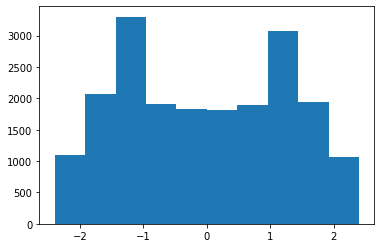

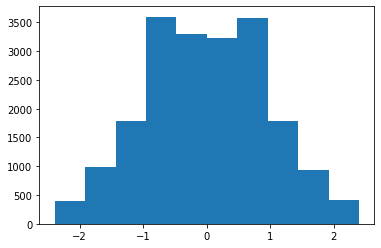

In [6]:
#Pseudorapidez

plt.hist(data["eta1"])
plt.show()

plt.hist(data["eta2"])
plt.show()

In [7]:
#Eliminar los muones tracker

Data_G = events.loc[events['type2'] !='T']

#Masa invariante global

E_G=(Data_G["E1"]+Data_G["E2"])**2
P_G=((Data_G["px1"]+Data_G["px2"])**2+(Data_G["py1"]+Data_G["py2"])**2+(Data_G["pz1"]+Data_G["pz2"])**2)
MI_G=np.sqrt(E_G - P_G)

fig_1= px.histogram(MI_G,MI_G, nbins=1000, range_x=['8','12'], labels={"x":"Masa Invariante GeV/c","y":"Evecntos"})
fig_1.show()

In [11]:
Phi1 = Data_G['phi1']
Phi2 = Data_G['phi2']

dPhi = np.abs(Phi1 - Phi2)

In [12]:
fig_2=px.histogram(Phi1, Phi1, nbins=100,  labels={"x": "Radianes", "y":"Eventos" } )
fig_2.update_layout(title=r"$\phi_1$")
fig_2.show()

fig_21=px.histogram(Phi2, Phi2, nbins=100,  labels={"x": "Radianes", "y":"Eventos" } )
fig_21.update_layout(title=r"$\phi_2$")
fig_21.show()

fig_22=px.histogram(dPhi, dPhi, nbins=1000, labels={"x":"Radianes", "y":"Eventos"} )
fig_22.show()